# Principal Component Analysis

In [55]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('titanic.csv')

### Data Preprocessing

In [57]:
# Select relevant attributes 
attributes = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

In [58]:
# Fill missing values in 'Age' and 'Embarked' attributes
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [59]:
# Convert categorical data into numerical data using LabelEncoder

df['Sex'] = LabelEncoder().fit_transform(df['Sex']) 
# Converts 'Sex' attribute to '0' for 'female' and '1' for 'male'

df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])
# Encodes 'Embarked' 

In [60]:
# Extract the features into a new DataFrame
x = df.loc[:, attributes].values

In [61]:
# Standardize the attributes
x = StandardScaler().fit_transform(x)

### PCA to Reduce the Dataset into 2 Principal Components

In [62]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(x)

In [63]:
# Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=pca_components, columns=['P1', 'P2'])

In [64]:
# Include the 'Survived' column for visualization (as target)
df_pca['Survived'] = df['Survived']

### Visualizing the Result 

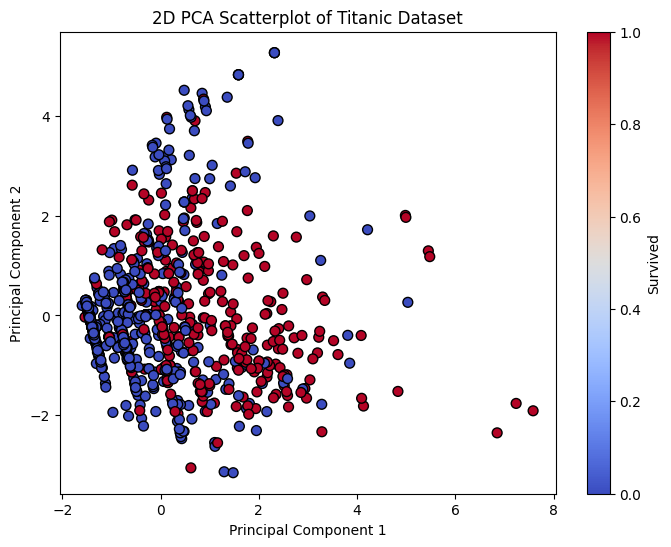

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(df_pca['P1'], df_pca['P2'], c = df_pca['Survived'], cmap='coolwarm', edgecolor='k', s=50)
plt.title('2D PCA Scatterplot of Titanic Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Survived')
plt.show()

### Explained Variance

In [66]:
exp_variance = pca.explained_variance_ratio_
print(f'Explained variance ratio by the components: {exp_variance}')

Explained variance ratio by the components: [0.26480442 0.24518892]
